## Risk-Return

In [1]:
#!pip install plotly
import statsmodels.api as sm
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
n_assets = 5
n_simulation = 500

In [3]:
returns = np.random.randn(n_assets, n_simulation)

In [4]:
rand = np.random.rand(n_assets)
weights = rand/sum(rand)

def port_return(returns):
    rets = np.mean(returns, axis=1)
    cov = np.cov(rets.T, aweights=weights, ddof=1)
    portfolio_returns = np.dot(weights, rets.T)
    portfolio_std_dev = np.sqrt(np.dot(weights, np.dot(cov, weights)))
    return portfolio_returns, portfolio_std_dev

In [5]:
portfolio_returns, portfolio_std_dev = port_return(returns)

In [6]:
print(portfolio_returns)
print(portfolio_std_dev)

0.02742043249044121
0.023435339658401458


In [7]:
portfolio = np.array([port_return(np.random.randn(n_assets, i))
                      for i in range(1, 101)])

In [8]:
best_fit = sm.OLS(portfolio[:, 1], sm.add_constant(portfolio[:, 0]))\
           .fit().fittedvalues

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Risk-Return Relationship',
                         x=portfolio[:, 0],
                         y=portfolio[:, 1], mode='markers'))
fig.add_trace(go.Scatter(name='Best Fit Line',
                         x=portfolio[:, 0],
                         y=best_fit, mode='lines'))
fig.update_layout(xaxis_title = 'Return',
                  yaxis_title = 'Standard Deviation',
                  width=900, height=470)
fig.show()

## Adverse Selection

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [11]:
def utility(x):
    return(np.exp(x**gamma))

In [12]:
pi = np.random.uniform(0,1,20)
pi = np.sort(pi)

In [13]:
print('The highest three probability of losses are {}'
      .format(pi[-3:]))

The highest three probability of losses are [0.96241933 0.99102292 0.99583589]


In [14]:
y = 2
c = 1.5
Q = 5
D = 0.01
gamma = 0.4

In [15]:
def supply(Q):
    return(np.mean(pi[-Q:]) * c)

In [16]:
def demand(D):
    return(np.sum(utility(y - D) > pi * utility(y - c) + (1 - pi) 
                  * utility(y)))

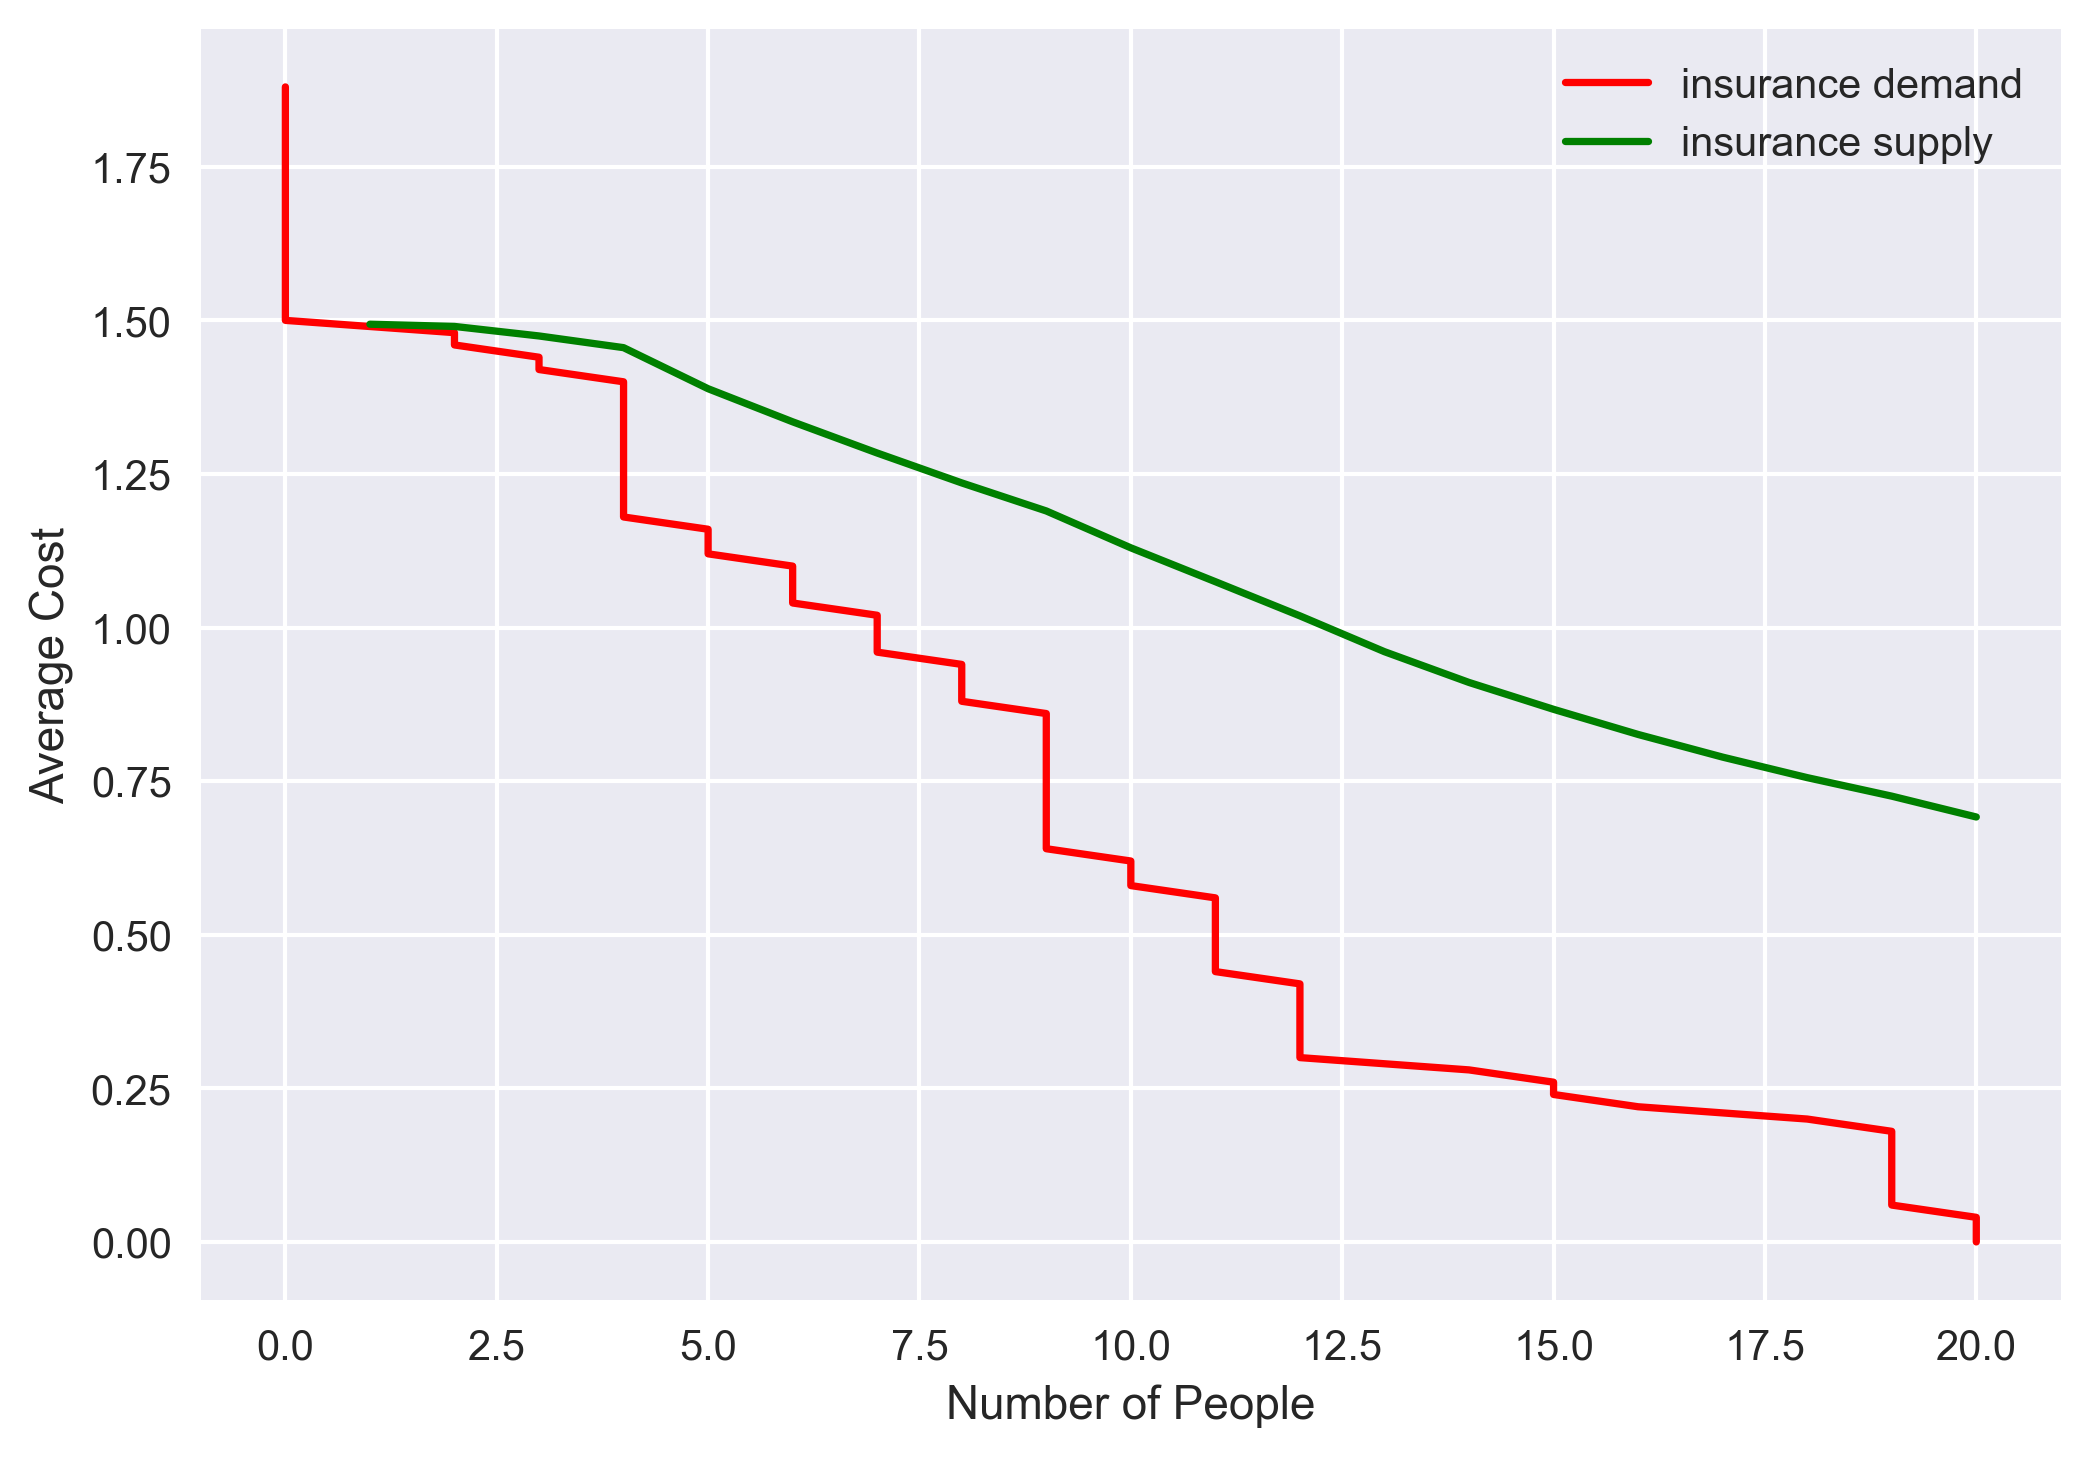

In [17]:
plt.figure()
plt.plot([demand(i) for i in np.arange(0, 1.9, 0.02)],
         np.arange(0, 1.9, 0.02), 
         'r', label='insurance demand')
plt.plot(range(1,21), [supply(j) for j in range(1,21)],
         'g', label='insurance supply')
plt.ylabel("Average Cost")
plt.xlabel("Number of People")
plt.legend()
plt.show()
